In [203]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_datareader as pdr
import urllib
import numpy as np
import datetime as dt

def graph_data(stock):
    print('currently pulling:',stock)
    #url ='http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    url = 'http://finance.yahoo.com/d/quotes.csv?s='+stock
    print(url)
    
#stock = input('stock to plot:')  
graph_data(stock)


currently pulling: tsla
http://finance.yahoo.com/d/quotes.csv?s=tsla


In [235]:
tsla = pdr.DataReader('tsla', data_source='yahoo', start='2018-1-1') 
tsla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,259.000000,246.070007,255.000000,247.630005,21849400,247.630005
2019-04-26,246.679993,231.130005,246.500000,235.139999,22360700,235.139999
2019-04-29,243.979996,232.169998,235.860001,241.470001,16714500,241.470001
2019-04-30,244.210007,237.000000,242.059998,238.690002,9464600,238.690002
2019-05-01,240.000000,231.500000,238.850006,234.009995,10693600,234.009995


In [236]:
#tsla = tsla.reset_index()
tsla.reset_index(inplace=True)
tsla.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
329,2019-04-25,259.000000,246.070007,255.000000,247.630005,21849400,247.630005
330,2019-04-26,246.679993,231.130005,246.500000,235.139999,22360700,235.139999
331,2019-04-29,243.979996,232.169998,235.860001,241.470001,16714500,241.470001
332,2019-04-30,244.210007,237.000000,242.059998,238.690002,9464600,238.690002
333,2019-05-01,240.000000,231.500000,238.850006,234.009995,10693600,234.009995


#print(type(tsla))
#plt.plot_date(tsla['Date'], tsla['Close'])
#tsla.plot.line([tsla.iloc],['Close'])

date_conv = np.vectorize(dt.datetime.fromtimestamp)
print(date_conv(564367812))

#del tsla['index'], remove index
#tsla['sDate'] = tsla.index
#tsla.reset_index(drop=True, inplace=True)

#tsla.set_index('Date', inplace=True)
#date = tsla.loc[:,'Date'].values
#date = tsla['Date'].values
#date = tsla.loc[:'sDate'].values


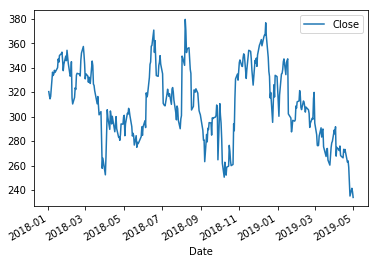

In [237]:
date = tsla.loc[:, 'Date'].values
closep = tsla.loc[:,'Close'].values
tsla.plot.line('Date','Close')

In [234]:
date

Text(737180.0, 0, '2019-05')

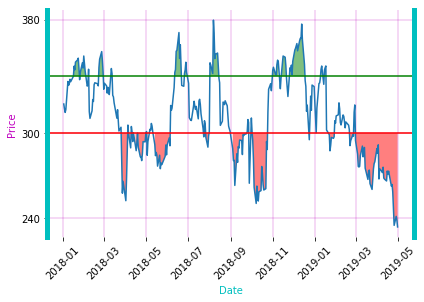

In [255]:

fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
plt.ylabel('Price')
plt.xlabel('Date')
#plot date/price
ax1.plot_date(date, closep ,'-')
# fill plot
#ax1.fill_between(date, closep , 240, alpha=0.3, edgecolor='r')
ax1.fill_between(date, closep ,340, where=(closep>=340),facecolor='g', alpha=0.5)
ax1.fill_between(date, closep ,300, where=(closep<=300),facecolor='r', alpha=0.5)
ax1.axhline(340, color='g')
ax1.axhline(300, color='r')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
ax1.grid(True, color = 'm', linestyle='-',linewidth=0.3)
ax1.yaxis.label.set_color('m')
ax1.xaxis.label.set_color('c')
ax1.set_yticks([240, 300, 380])

ax1.spines['left'].set_color('c')
ax1.spines['right'].set_color('c')
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_linewidth(5)
ax1.spines['right'].set_linewidth(5)

plt.subplots_adjust(left=0.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
plt.show()